In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 32)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline
import missingno as msno
import folium
from folium.plugins import HeatMap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
len(df.columns)

32

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.dtypes.value_counts()

int64      16
object     12
float64     4
Name: count, dtype: int64

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

## Missing value summary

In [ ]:
null_df = pd.DataFrame({"Null Values": df.isnull().sum(),
                         "Percentage Null Values": (df.isnull().sum()) / (df.shape[0]) * 100
                         })

null_df

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

## Visualize Missing Values

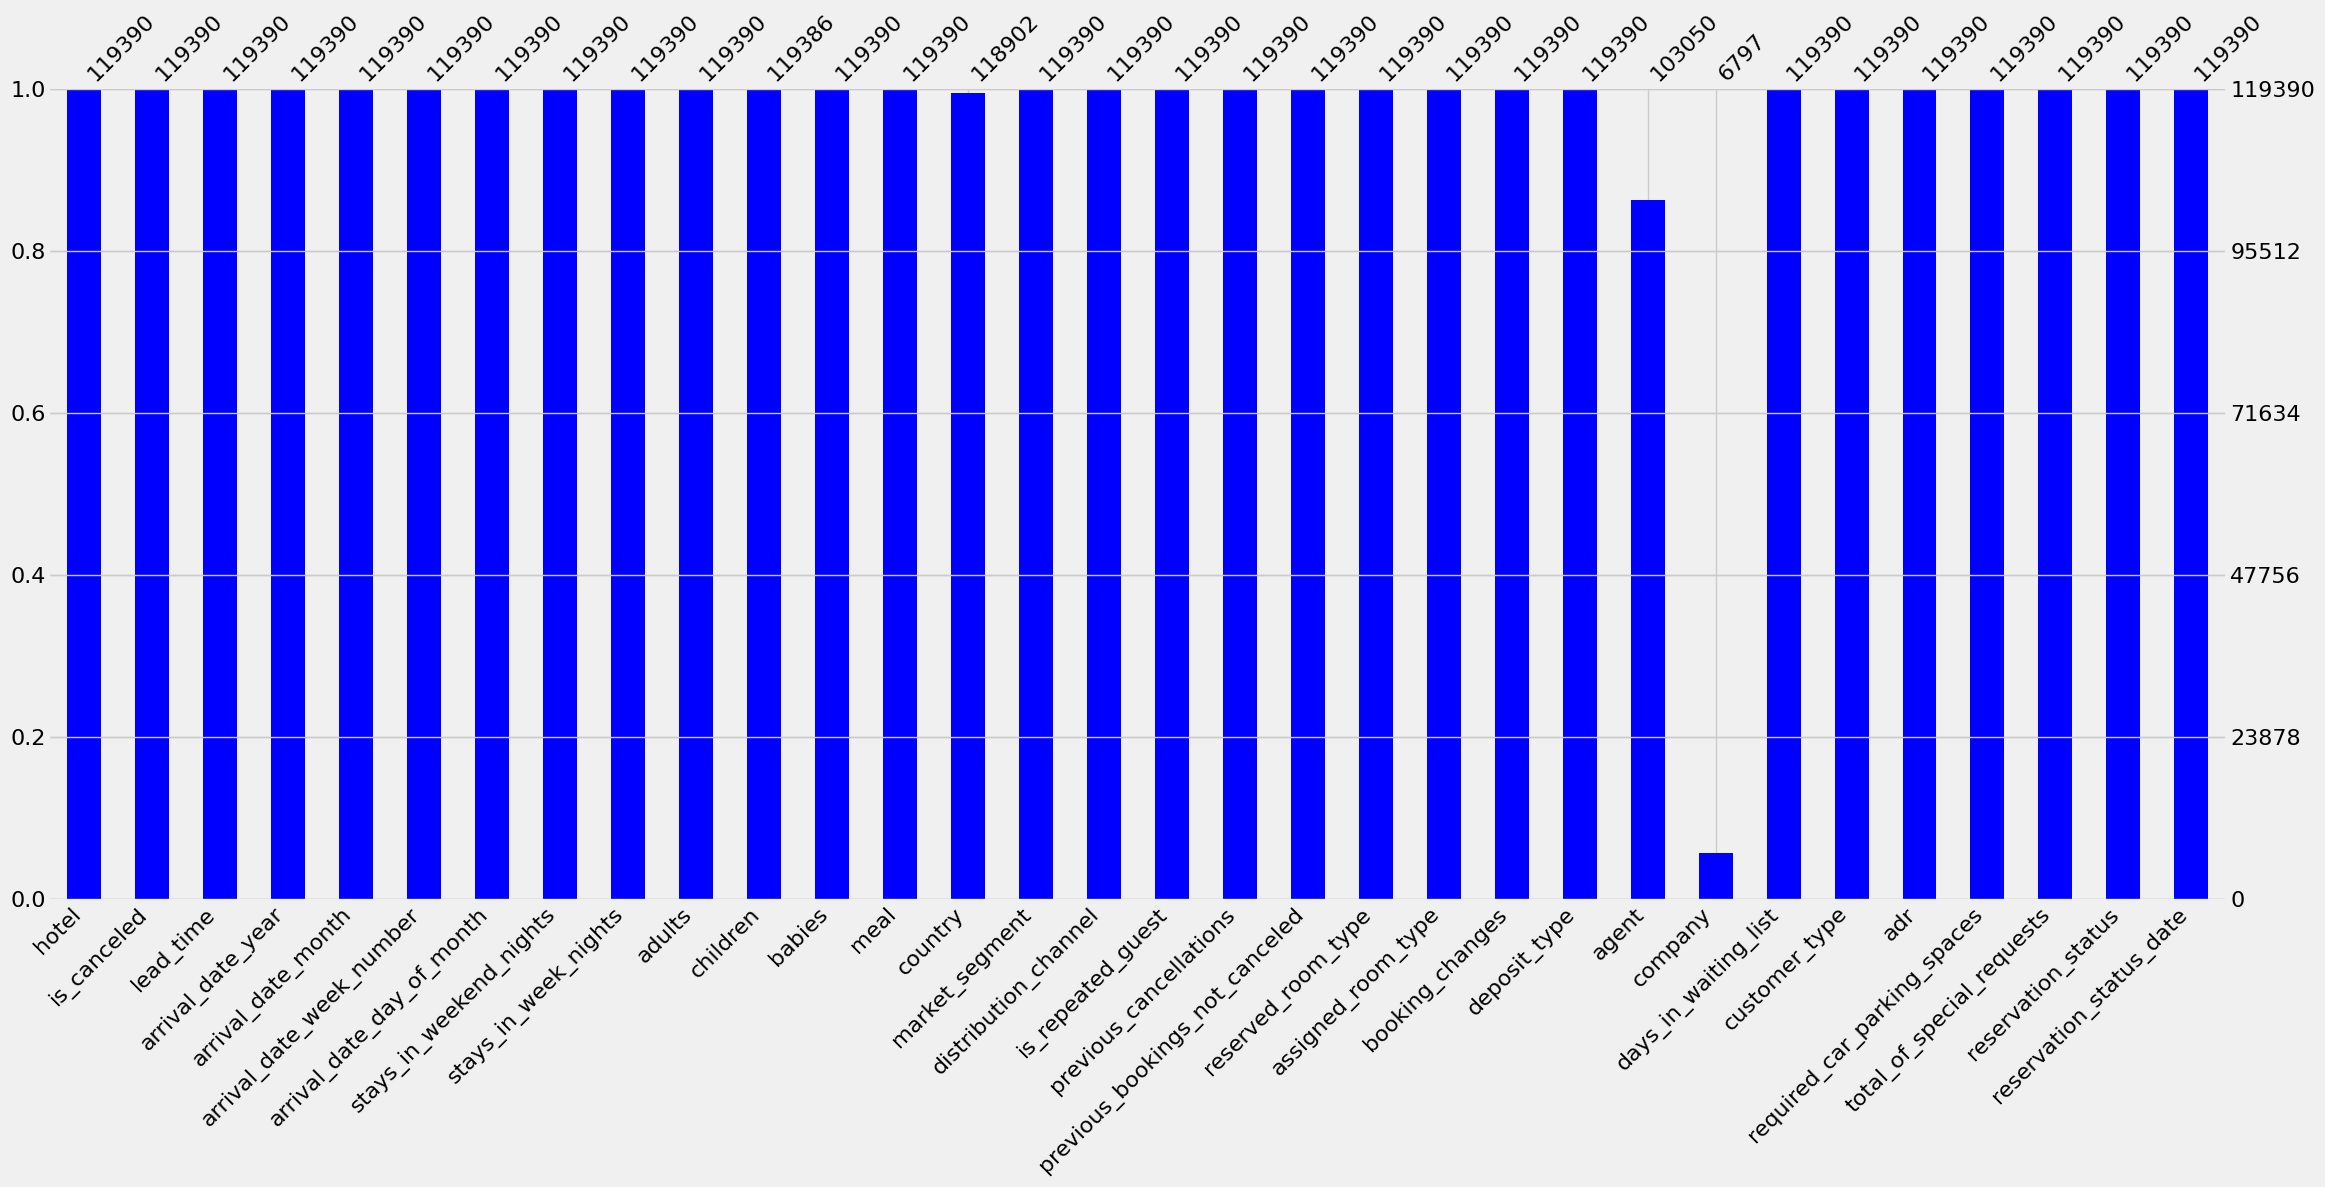

In [ ]:
msno.bar(df, color="blue")

plt.show()

##Data Cleaning

1.For both 'children' and 'country' columns, remove rows with missing values. However, for the 'children' column, retain rows where missing values do not exceed 1% and the values are non-negative. We need to consider adjusting the distribution of the number of children.

In [ ]:
# Drop rows with missing 'country' or 'children' columns
df = df[df["country"].isnull() == False]
df = df[df["children"].isnull() == False]

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

2、The 'company' field has a high missing value rate of 94.3%, we consider directly deleting this field

In [ ]:
df.drop("company", axis=1, inplace=True)

3.The 'agent' field (agency fees) has a missing value rate of 13.68%. It can be handled as follows:
  - It's impossible to determine the specific data for the missing values.
  - The mode (the most frequently occurring value)
  - The mean of the existing values in the field.

Here, we consider using 0 to fill in the missing values:

In [ ]:
df["agent"].value_counts()

agent
9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
70.0         1
93.0         1
54.0         1
497.0        1
59.0         1
Name: count, Length: 332, dtype: int64

In [ ]:
df["agent"].fillna(0,inplace=True)

## Special Data Preprocessing

1. Occupancy count must not be zero
   Given that the attributes 'adults', 'children', and 'babies' represent the occupancy of a room, it is imperative that their combined count is greater than zero, as a room cannot have an occupancy of zero. This necessitates a constraint where the sum of these features must not equal zero.

In [ ]:
special = (df["children"] == 0) & (df.adults == 0) & (df.babies == 0)
special.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
df = df[~special]

2. Daily average can't be negative, the maximum is 5400 can be considered as outlier.

In [ ]:
df["adr"].value_counts().sort_index()

adr
-6.38          1
 0.00       1799
 0.26          1
 0.50          1
 1.00         14
            ... 
 450.00        1
 451.50        1
 508.00        1
 510.00        1
 5400.00       1
Name: count, Length: 8857, dtype: int64

In [ ]:
# Use a violin plot to view the distribution of data: Before processing, there are obvious outliers
px.violin(y=df["adr"])

In [ ]:
px.box(df,y="adr")

In [ ]:
# Remove entries with 'adr' greater than 1000 df = df.drop(df[df.adr > 1000].index)"
df = df[(df["adr"] >= 0) & (df["adr"] < 5400)]

In [ ]:
px.violin(y=df["adr"])  # 删除后

In [ ]:
px.box(df,y="adr",color="hotel")   # 删除后

## Exploratory Data Analysis
#### Comparison of the number of customers who canceled versus those who did not cancel

In [ ]:
df["is_canceled"].value_counts()

is_canceled
0    74590
1    44138
Name: count, dtype: int64

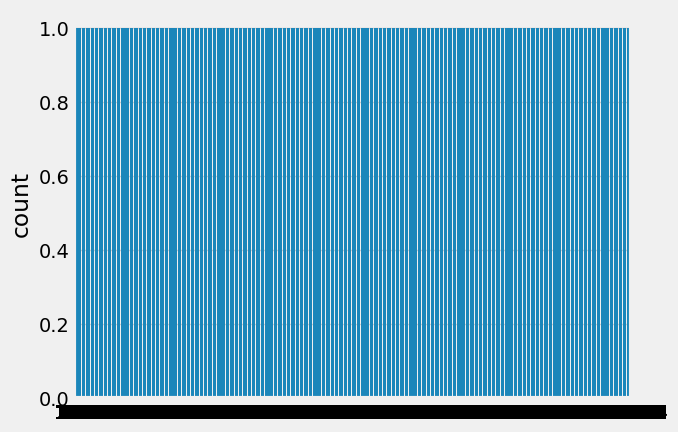

In [ ]:
sns.countplot(df["is_canceled"])

plt.show()

### Where do the customers who have not canceled come from?

In [ ]:
data = df[df.is_canceled == 0]

In [ ]:
number_no_canceled = data["country"].value_counts().reset_index()
number_no_canceled.columns = ["country", "number_of_no_canceled"]

number_no_canceled

country  number_of_no_canceled
0       PRT                  20977
1       GBR                   9668
2       FRA                   8468
3       ESP                   6383
4       DEU                   6067
..      ...                    ...
160     BHR                      1
161     DJI                      1
162     MLI                      1
163     NPL                      1
164     FRO                      1

[165 rows x 2 columns]

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(number_no_canceled,
                           locations = number_no_canceled['country'],
                           color = number_no_canceled['number_of_no_canceled'],
                           hover_name = number_no_canceled['country'])
guests_map.show()

#### **Conclusion**: The majority of the customers making reservations are from Portugal, with most coming from European countries

####What is the average daily price?

In [ ]:
px.box(data,  # 数据
       x="reserved_room_type",  # x
       y="adr", # y
       color="hotel",  # 颜色
       template="plotly_dark",  # 主题
       category_orders={"reserved_room_type":["A","B","C","D","E","F","G","H","L"]} # 指定排列顺序
      )

#### **Conclusion:** The average price per room is dependent on its type and standard deviation

###What is the price per night throughout the year?
Annual average price variation for two different types of hotels.

In [ ]:
data_resort = data[data["hotel"] == "Resort Hotel"]
data_city = data[data["hotel"] == "City Hotel"]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946178
10            October  102.004672
11          September  112.776582

In [ ]:
total_hotel = pd.merge(resort_hotel, city_hotel,
                        on="arrival_date_month"
                        )
total_hotel.columns = ["month","price_resort","price_city"]
total_hotel

month  price_resort  price_city
0       April     76.176140  111.962267
1      August    181.348715  118.674598
2    December     68.634584   88.401855
3    February     54.468180   86.520062
4     January     48.994018   82.330983
5        July    150.483553  115.818019
6        June    108.133154  117.874360
7       March     57.408308   90.658533
8         May     76.734804  120.669827
9    November     48.882907   86.946178
10    October     61.932777  102.004672
11  September     96.288897  112.776582

In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=b596be6a2890be9d715ffd237328f152c293038941e6d902ac45834c6f32e55c
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=a32a5dd81f9640377e8bc0d59acc3bf94224eda14800d26f87e564c91e09844a
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column):
    result = sd.Sort_Dataframeby_Month(df,column)
    return result

In [ ]:
new_total_hotel = sort_month(total_hotel, "month")
new_total_hotel

month  price_resort  price_city
0     January     48.994018   82.330983
1    February     54.468180   86.520062
2       March     57.408308   90.658533
3       April     76.176140  111.962267
4         May     76.734804  120.669827
5        June    108.133154  117.874360
6        July    150.483553  115.818019
7      August    181.348715  118.674598
8   September     96.288897  112.776582
9     October     61.932777  102.004672
10   November     48.882907   86.946178
11   December     68.634584   88.401855

In [ ]:
fig = px.line(new_total_hotel,
        x = "month",
        y = ["price_resort", "price_city"],
        title = "Price of per night over the Months",
        template = "plotly_dark"
       )

fig.show()

#### **Conclusion**

1. Resort Hotel's prices are noticeably higher than City Hotel's during the summer season.

2. The price fluctuations of City Hotel are relatively smaller. However, the prices at City Hotel start high from April and remain high until September.

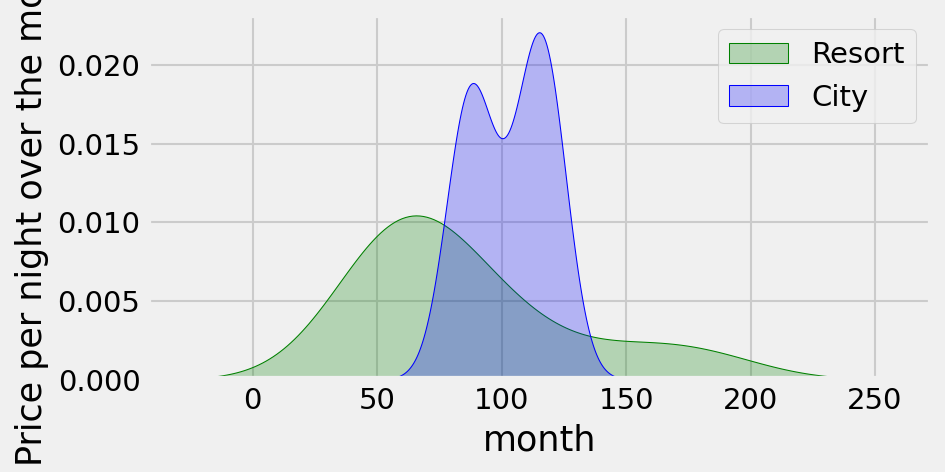

In [ ]:
plt.figure(figsize=(6,3), dpi=150)

ax = sns.kdeplot(new_total_hotel["price_resort"],
                 color="green",
                 shade=True)

ax = sns.kdeplot(new_total_hotel["price_city"],
                 color="blue",
                 shade=True)

ax.set_xlabel("month")
ax.set_ylabel("Price per night over the month")
ax = ax.legend(["Resort","City"])

### the most busy months

In [ ]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['Month','No_Resort_Guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['Month','No_City_Guests']

final_guests = pd.merge(resort_guests, city_guests)

In [ ]:
new_final_guests = sort_month(final_guests, "Month")
new_final_guests

Month  No_Resort_Guests  No_City_Guests
0     January              1812            2249
1    February              2253            3051
2       March              2517            4049
3       April              2518            4010
4         May              2523            4568
5        June              2026            4358
6        July              3110            4770
7      August              3237            5367
8   September              2077            4283
9     October              2528            4326
10   November              1937            2674
11   December              1970            2377

In [ ]:
fig = px.line(new_final_guests,
        x = "Month",
        y = ["No_Resort_Guests", "No_City_Guests"],
        title = "No of per Month",
        template = "plotly_dark"
       )

fig.show()

### **Conclusion：**
It is clearly observed that City Hotel has a higher guest count than Resort Hotel, indicating greater popularity.

Despite higher prices (as referenced in the earlier graph), City Hotel reaches its peak occupancy during July and August.

Both hotels have significantly lower guest counts during the winter season

###How long does the customer stay?

In [ ]:
data["total_nights"] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit    0.0   
1                  C                4   No Deposit    0.0   
2                  C                0   No Deposit    0.0   
3                  A                0   No Deposit  304.0   
4                  A                0   No Deposit  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   total_nights  
0             0  
1             0  
2             1  
3             1  
4             2

In [ ]:
#两个不同酒店在不同停留时间下的统计：

stay_groupby = (data.groupby(['total_nights', 'hotel'])["is_canceled"]
                .agg("count")
                .reset_index()
                .rename(columns={"is_canceled":"Number of stays"}))

stay_groupby.head()

total_nights         hotel  Number of stays
0             0    City Hotel              251
1             0  Resort Hotel              366
2             1    City Hotel             9155
3             1  Resort Hotel             6368
4             2    City Hotel            10983

In [ ]:
stay_groupby = (data.groupby(['total_nights', 'hotel'])["is_canceled"]
                .agg("count")
                .reset_index()
                .rename(columns={"is_canceled":"Number of stays"}))

stay_groupby.head()

total_nights         hotel  Number of stays
0             0    City Hotel              251
1             0  Resort Hotel              366
2             1    City Hotel             9155
3             1  Resort Hotel             6368
4             2    City Hotel            10983

In [ ]:
fig = px.bar(stay_groupby,
       x = "total_nights",
       y = "Number of stays",
       color = "hotel",
       barmode = "group"
      )

fig.show()

## Data Pre Processing
#### Feature correlation study

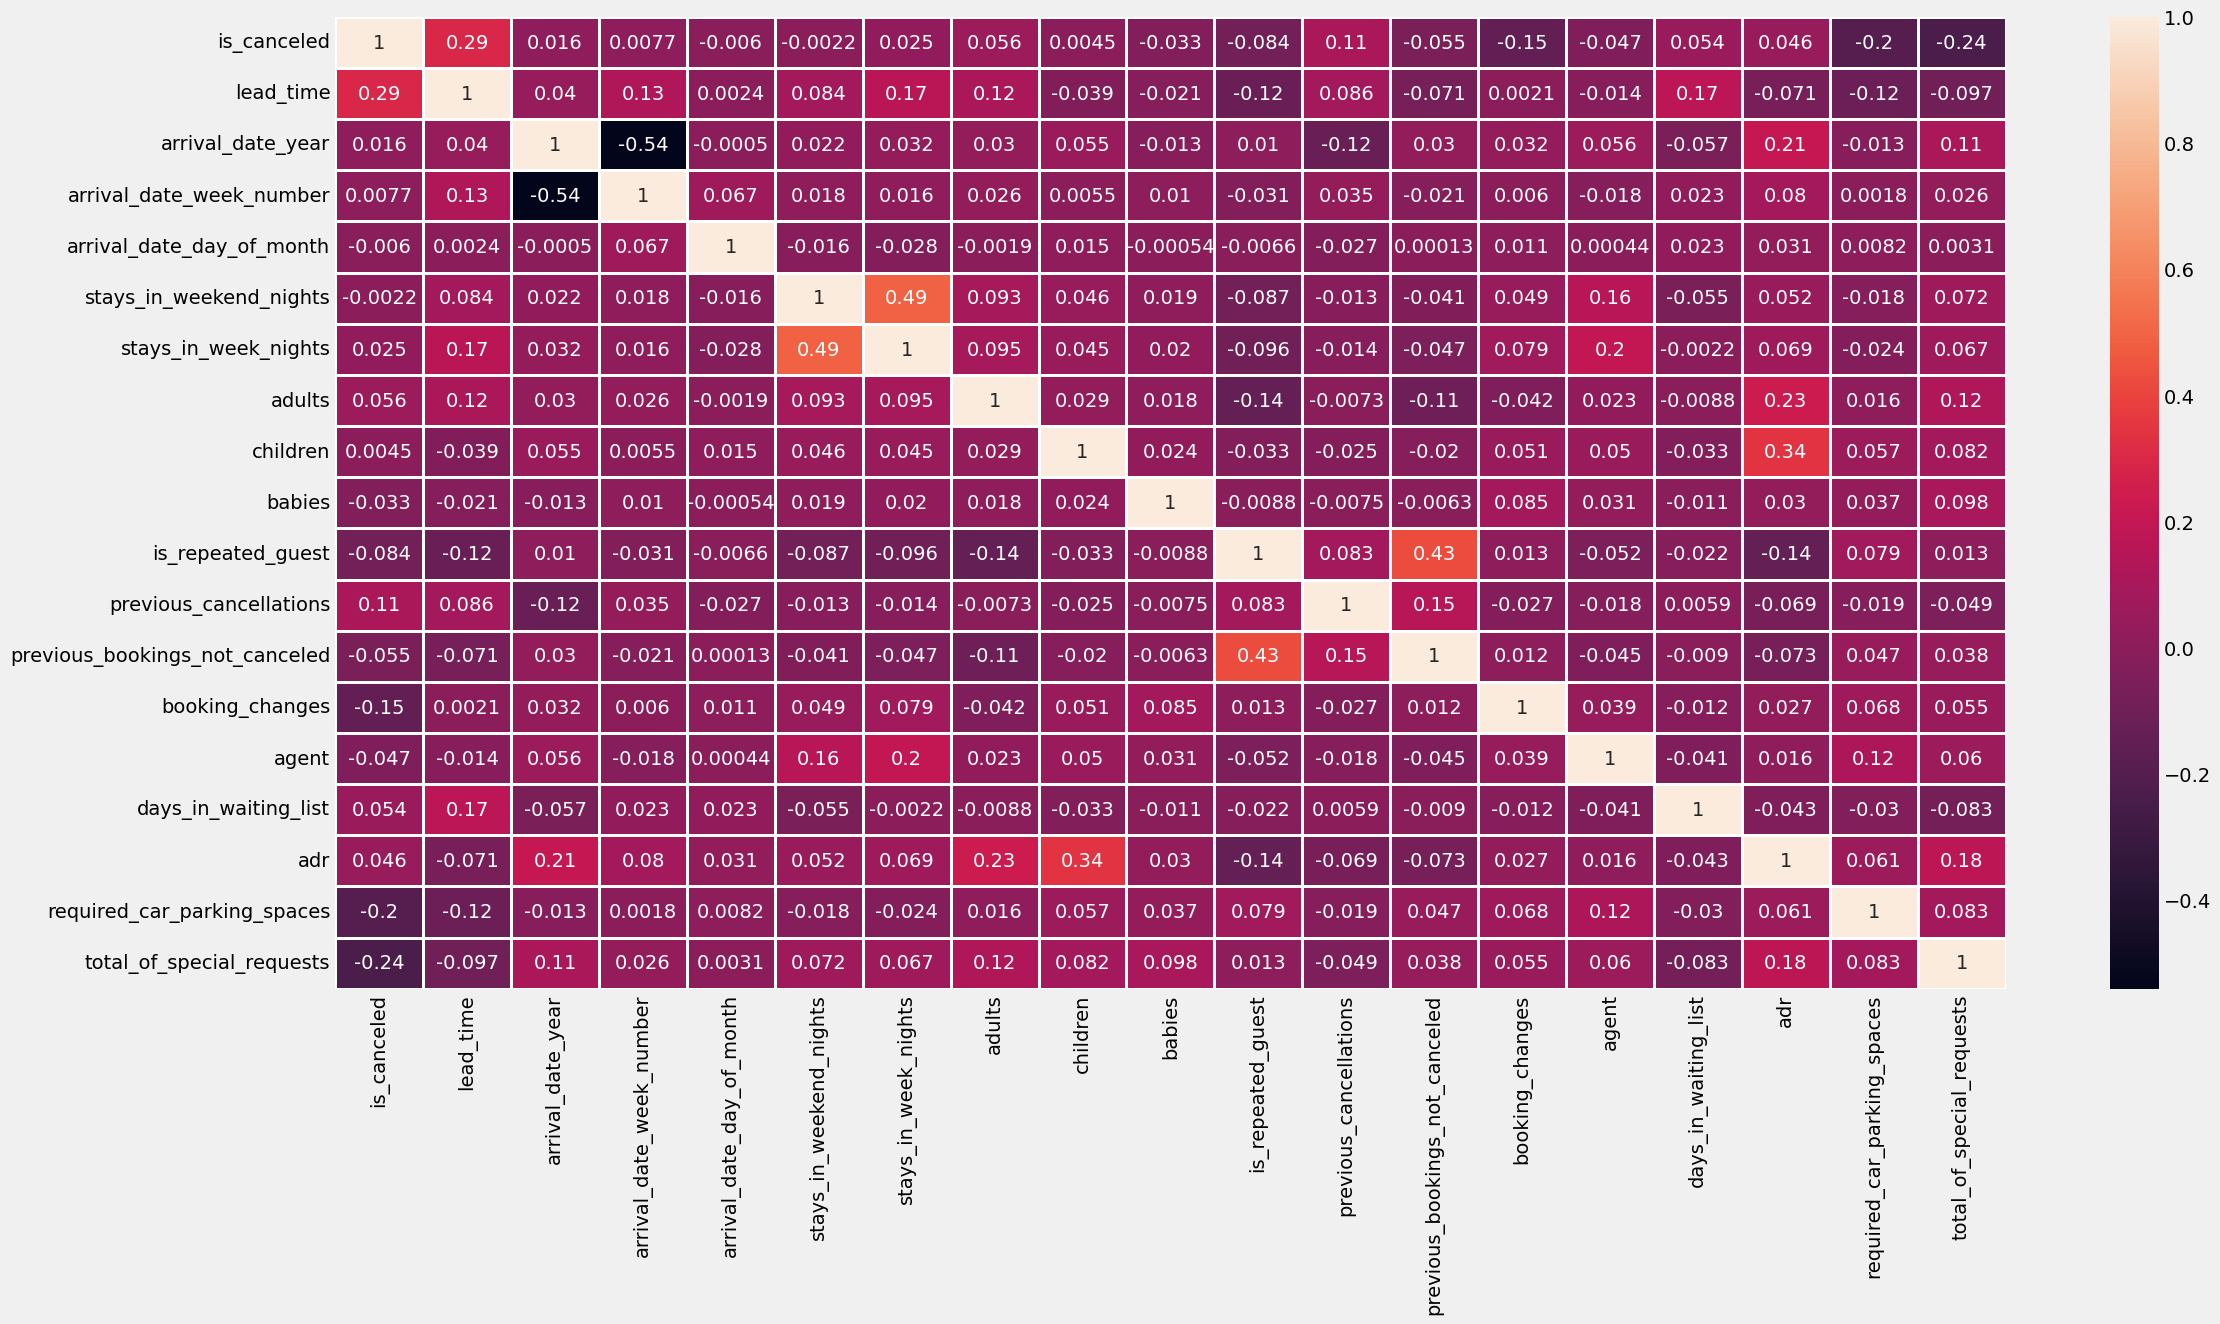

In [ ]:
plt.figure (figsize=(24,12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
corr_with_iscanceled = df.corr()["is_canceled"].abs().sort_values(ascending=False)

corr_with_iscanceled

ValueError: could not convert string to float: 'Resort Hotel'

In [ ]:
#Delete columns that are to correlated with others
no_use_col = ['arrival_date_year', 'assigned_room_type',
             'booking_changes','reservation_status',
             'country', 'days_in_waiting_list']

In [ ]:
df.drop(no_use_col, axis=1, inplace=True)

### Feature Engineering

In [ ]:
df["hotel"].dtype

dtype('O')

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == "O"]
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df[cat_cols]

In [ ]:
cat_df.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

In [ ]:
cat_df["year"] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df.drop(['reservation_status_date','arrival_date_month'], axis=1, inplace=True)

In [ ]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")


hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 16 29 19 18  9 13  4 12 26 17 15 10 20 14
 30 28 25 21 27 24 31]



### Feature Encoding

In [ ]:
# hotel
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0,
                                       'City Hotel' : 1})
# meal
cat_df['meal'] = cat_df['meal'].map({'BB' : 0,
                                     'FB': 1,
                                     'HB': 2,
                                     'SC': 3,
                                     'Undefined': 4})
# market_segment
cat_df['market_segment'] = (cat_df['market_segment']
                            .map({'Direct': 0,
                                 'Corporate':1,
                                 'Online TA':2,
                                 'Offline TA/TO': 3,
                                 'Complementary': 4,
                                 'Groups': 5,
                                 'Undefined': 6,
                                 'Aviation': 7}))
# distribution_channel
cat_df['distribution_channel'] = (cat_df['distribution_channel']
                                  .map({'Direct': 0,
                                        'Corporate': 1,
                                        'TA/TO': 2,
                                        'Undefined': 3,
                                        'GDS': 4}))
# reserved_room_type
cat_df['reserved_room_type'] = (cat_df['reserved_room_type']
                                .map({'C': 0,
                                      'A': 1,
                                      'D': 2,
                                      'E': 3,
                                      'G': 4,
                                      'F': 5,
                                      'H': 6,
                                      'L': 7,
                                      'B': 8}))
# deposit_type
cat_df['deposit_type'] = (cat_df['deposit_type']
                          .map({'No Deposit': 0,
                                'Refundable': 1,
                                'Non Refund': 3}))
# customer_type
cat_df['customer_type'] = (cat_df['customer_type']
                           .map({'Transient': 0,
                                 'Contract': 1,
                                 'Transient-Party': 2,
                                 'Group': 3})
                          )
# year
cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

### Data Normalization

In [ ]:
num_df = df.drop(columns=cat_cols,axis=1)

num_df.drop("is_canceled",axis=1,inplace=True)

In [ ]:
log_col = ["lead_time","arrival_date_week_number","arrival_date_day_of_month","agent","adr"]

for col in log_col:
    num_df[col] = np.log(num_df[col] + 1)

num_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   5.837730                  3.332205                   0.693147   
1   6.603944                  3.332205                   0.693147   
2   2.079442                  3.332205                   0.693147   
3   2.639057                  3.332205                   0.693147   
4   2.708050                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

      agent       adr  required_car_parking_spaces  total_of_special_requests  
0  0.000000  0.000000                            0                          0  
1  0.000000  0.000000                            0                          0  
2  0.000000  4.330733                            0                          0  
3  5.720312  4.330733                            0                          0  
4  5.484797  4.595120                            0                          1

In [ ]:
X = pd.concat([cat_df, num_df], axis=1)
y = df["is_canceled"]

In [ ]:
print(X.shape)
print(y.shape)

(118726, 25)
(118726,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=412)

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8134843763160111
Confusion Matrix : 
[[14172   797]
 [ 3632  5145]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.86     14969
           1       0.87      0.59      0.70      8777

    accuracy                           0.81     23746
   macro avg       0.83      0.77      0.78     23746
weighted avg       0.82      0.81      0.80     23746



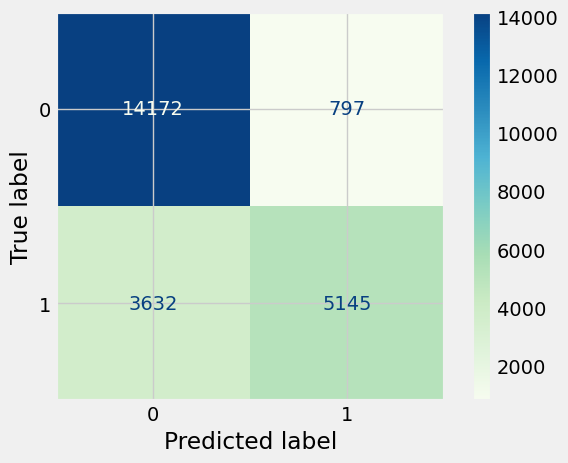

In [ ]:
classes = ["0","1"]

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=classes)
disp.plot(
    include_values=True,
    cmap="GnBu",
    ax=None,
    xticks_rotation="horizontal",
    values_format="d"
)

plt.show()

In [ ]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

In [ ]:
#Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

In [ ]:
#Random Forest
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

In [ ]:
#Adaboost
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

In [ ]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

In [ ]:
#XGBoost
xgb = XGBClassifier(booster='gbtree',
                    learning_rate=0.1,
                    max_depth=5,
                    n_estimators=180)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

In [ ]:
#CatBoost
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4751764	total: 156ms	remaining: 15.5s
1:	learn: 0.4103107	total: 168ms	remaining: 8.23s
2:	learn: 0.3533169	total: 183ms	remaining: 5.91s
3:	learn: 0.3290297	total: 191ms	remaining: 4.59s
4:	learn: 0.2719981	total: 200ms	remaining: 3.8s
5:	learn: 0.2492807	total: 209ms	remaining: 3.28s
6:	learn: 0.2152683	total: 217ms	remaining: 2.88s
7:	learn: 0.1919799	total: 224ms	remaining: 2.58s
8:	learn: 0.1776196	total: 231ms	remaining: 2.34s
9:	learn: 0.1654125	total: 238ms	remaining: 2.14s
10:	learn: 0.1555014	total: 244ms	remaining: 1.97s
11:	learn: 0.1452100	total: 250ms	remaining: 1.83s
12:	learn: 0.1381844	total: 256ms	remaining: 1.71s
13:	learn: 0.1327335	total: 262ms	remaining: 1.61s
14:	learn: 0.1276286	total: 269ms	remaining: 1.52s
15:	learn: 0.1220964	total: 274ms	remaining: 1.44s
16:	learn: 0.1148292	total: 281ms	remaining: 1.37s
17:	learn: 0.1117525	total: 286ms	remaining: 1.3s
18:	learn: 0.1047834	total: 292ms	remaining: 1.25s
19:	learn: 0.10068

In [ ]:
#Extra Trees Classifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

In [ ]:
#LGBM
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

In [ ]:
#Voting Classifier

classifiers = [('Gradient Boosting Classifier', gb),
               ('Cat Boost Classifier', cat),
               ('XGboost', xgb),
               ('Decision Tree', dtc),
               ('Extra Tree', etc),
               ('Light Gradient', lgbm),
               ('Random Forest', rd_clf),
               ('Ada Boost', ada),
               ('Logistic', lr),
               ('Knn', knn)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

Learning rate set to 0.5
0:	learn: 0.4751764	total: 10.5ms	remaining: 1.04s
1:	learn: 0.4103107	total: 19.7ms	remaining: 964ms
2:	learn: 0.3533169	total: 28.4ms	remaining: 917ms
3:	learn: 0.3290297	total: 35.7ms	remaining: 857ms
4:	learn: 0.2719981	total: 43.2ms	remaining: 822ms
5:	learn: 0.2492807	total: 50.3ms	remaining: 788ms
6:	learn: 0.2152683	total: 57.8ms	remaining: 768ms
7:	learn: 0.1919799	total: 64.3ms	remaining: 739ms
8:	learn: 0.1776196	total: 70.6ms	remaining: 714ms
9:	learn: 0.1654125	total: 76.8ms	remaining: 691ms
10:	learn: 0.1555014	total: 82.8ms	remaining: 670ms
11:	learn: 0.1452100	total: 89.3ms	remaining: 655ms
12:	learn: 0.1381844	total: 95.4ms	remaining: 638ms
13:	learn: 0.1327335	total: 102ms	remaining: 625ms
14:	learn: 0.1276286	total: 108ms	remaining: 611ms
15:	learn: 0.1220964	total: 114ms	remaining: 599ms
16:	learn: 0.1148292	total: 120ms	remaining: 588ms
17:	learn: 0.1117525	total: 127ms	remaining: 577ms
18:	learn: 0.1047834	total: 133ms	remaining: 566ms
19:

### Deep Learning Models
### data pre-processing and split

In [ ]:
from tensorflow.keras.utils import to_categorical

X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(df['is_canceled'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
X.shape[1]

25

In [ ]:
model = Sequential()

model.add(Dense(100, activation="relu",input_shape=(X.shape[1], )))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_history = model.fit(X_train,
                          y_train,
                          validation_data = (X_test, y_test),
                          epochs = 50)

Epoch 1/50
2969/2969 [==============================] - 2s 657us/step - loss: 0.3324 - accuracy: 0.8631 - val_loss: 0.2052 - val_accuracy: 0.9319
Epoch 2/50
2969/2969 [==============================] - 2s 626us/step - loss: 0.1561 - accuracy: 0.9474 - val_loss: 0.1230 - val_accuracy: 0.9582
Epoch 3/50
2969/2969 [==============================] - 2s 610us/step - loss: 0.1179 - accuracy: 0.9615 - val_loss: 0.1209 - val_accuracy: 0.9629
Epoch 4/50
2969/2969 [==============================] - 2s 609us/step - loss: 0.0927 - accuracy: 0.9711 - val_loss: 0.0882 - val_accuracy: 0.9696
Epoch 5/50
2969/2969 [==============================] - 2s 625us/step - loss: 0.0804 - accuracy: 0.9752 - val_loss: 0.0815 - val_accuracy: 0.9717
Epoch 6/50
2969/2969 [==============================] - 2s 637us/step - loss: 0.0732 - accuracy: 0.9769 - val_loss: 0.0654 - val_accuracy: 0.9786
Epoch 7/50
2969/2969 [==============================] - 2s 612us/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0523 -

In [ ]:
train_loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]

epoch = range(1,51)

loss = pd.DataFrame({"train_loss": train_loss,
                     "val_loss":val_loss
                    })
loss.head()

train_loss  val_loss
0    0.332411  0.205177
1    0.156089  0.123037
2    0.117903  0.120891
3    0.092652  0.088245
4    0.080399  0.081451

In [ ]:
train_loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]

epoch = range(1,51)

loss = pd.DataFrame({"train_loss": train_loss,
                     "val_loss":val_loss
                    })
loss.head()

train_loss  val_loss
0    0.332411  0.205177
1    0.156089  0.123037
2    0.117903  0.120891
3    0.092652  0.088245
4    0.080399  0.081451

In [ ]:
fig = px.line(loss,
        x=epoch,
        y=['val_loss','train_loss'],
        title='Train and Val Loss')

fig.show()

In [ ]:
#accuracy
train_acc = model_history.history["accuracy"]
val_acc = model_history.history["val_accuracy"]

epoch = range(1,51)

acc = pd.DataFrame({"train_acc": train_acc,
                     "val_acc":val_acc
                    })

px.line(acc,
        x=epoch,
        y=['val_acc','train_acc'],
        title = 'Train and Val Accuracy',
        template = 'plotly_dark')

In [ ]:
acc_ann = model.evaluate(X_test, y_test)[1]
acc_ann


743/743 [==============================] - 0s 439us/step - loss: 0.0233 - accuracy: 0.9928


0.9927566647529602

### Model Comparision

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN',
               'Decision Tree Classifier',
               'Random Forest Classifier',
               'Ada Boost Classifier',
               'Gradient Boosting Classifier',
               'XgBoost', 'Cat Boost',
               'Extra Trees Classifier',
               'LGBM', 'Voting Classifier','ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc,
               acc_rd_clf, acc_ada, acc_gb,
               acc_xgb, acc_cat, acc_etc,
               acc_lgbm, acc_vtc, acc_ann]
})


models = models.sort_values(by = 'Score', ascending = True, ignore_index=True)

models["Score"] = models["Score"].apply(lambda x: round(x,4))
models

Model   Score
0            Logistic Regression  0.8135
1                            KNN  0.8962
2   Gradient Boosting Classifier  0.9183
3       Decision Tree Classifier  0.9513
4           Ada Boost Classifier  0.9513
5         Extra Trees Classifier  0.9538
6       Random Forest Classifier  0.9562
7              Voting Classifier  0.9672
8                           LGBM  0.9740
9                        XgBoost  0.9833
10                           ANN  0.9928
11                     Cat Boost  0.9961

In [ ]:
fig = px.bar(models,
       x="Score",
       y="Model",
       text="Score",
       color="Score",
       template="plotly_dark",
       title="Models Comparision"
      )

fig.show()

### We can see that Cat Boost achieved 99.61% accuracy which is quite impressive
